# Model Checking


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from load_utils import *

In [2]:
d = load_diffs(keep_diff = True)
df_events, df_blocked_user_text = load_block_events_and_users()

### Q: How does the distribution over attack probabilities compare across annotators vs models?

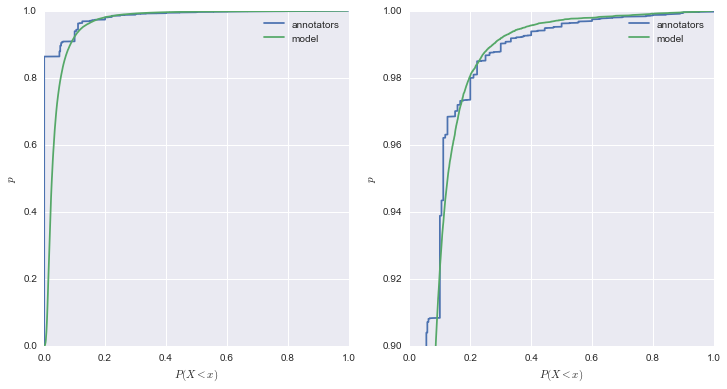

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 6))

xa = np.sort(d['annotated']['recipient_score'])
ya = 1. * np.arange(len(xa)) / (len(xa) - 1)

xm = np.sort(d['annotated']['pred_recipient_score'])
ym = 1. * np.arange(len(xm)) / (len(xm) - 1)

ax1 = fig.add_subplot(121)
ax1.plot(xa, ya, label = 'annotators')
ax1.plot(xm, ym, label = 'model')
ax1.set_xlabel('$P(X<x)$')
ax1.set_ylabel('$p$')
ax1.legend()


ax2 = fig.add_subplot(122)
ax2.plot(xa, ya, label = 'annotators')
ax2.plot(xm, ym, label = 'model')
ax2.set_xlabel('$P(X<x)$')
ax2.set_ylabel('$p$')
ax2.set_ylim((0.90, 1))
ax2.legend()

Model does not assign 0 scores, like the annotators.
Model score distribution is skewed left for x > 0.2.

### Q: How do differences in distribution over attack probabilities between annotators and models impact estomates of prevalence of personal attacks?

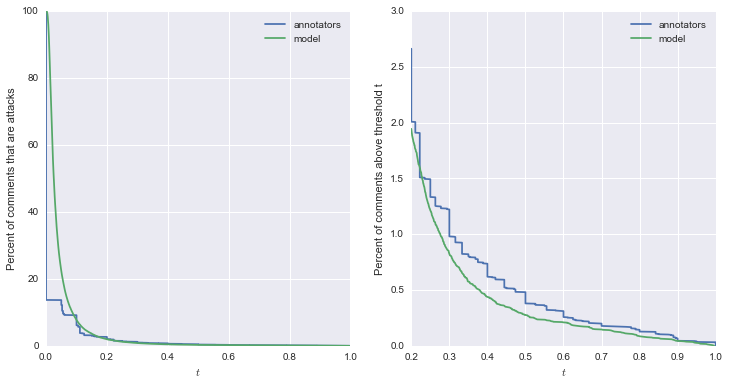

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 6))

xa = np.sort(d['annotated']['recipient_score'])
ya = 100 * (1 - (1. * np.arange(len(xa)) / (len(xa) - 1)))

xm = np.sort(d['annotated']['pred_recipient_score'])
ym = 100 * (1 - (1. * np.arange(len(xm)) / (len(xm) - 1)))

ax1 = fig.add_subplot(121)
ax1.plot(xa, ya, label = 'annotators')
ax1.plot(xm, ym, label = 'model')
ax1.set_xlabel('$t$')
ax1.set_ylabel('Percent of comments that are attacks')
ax1.legend()


ax2 = fig.add_subplot(122)
ax2.plot(xa, ya, label = 'annotators')
ax2.plot(xm, ym, label = 'model')
ax2.set_xlabel('$t$')
ax2.set_ylabel('Percent of comments above threshold t')
ax2.set_ylim((0.0, 3))
ax2.set_xlim((0.2, 1.0))
ax2.legend()
plt.savefig('../../paper/figs/model_vs_annotator_percent_attack_distributions.png')

### Q: What do comments in different score intervals look like?

In [8]:
def check_range(d, col, min, max, n = 10, ):
    df = d.query('%s >= %f and %s <= %f' % (col, min, col, max))
    for i, r in df.sample(n).iterrows():
        print(r[col])
        print(r.clean_diff)
        print('\n')  

In [16]:
check_range(d['sample'], 'pred_aggression_score',0.5, 0.6)

0.5670213662087917
"What i added was pure briliiance. I am the single greatest  hero ever, and having a limp dicked little liberal like you step in my way is like stepping in front of Jesus and saying ""Woah buddy, i think youre wrong, I'll just erase these tablets."" You have no idea the physical and mental anguish i could put you through. I am a ilving legend, and now I wil extend every inch of my being into hunting you down and shoving Rolling Stones music down your throat, since i'm sure youre puss-rock tempered ears would bleed like a virgin from misuse. You should consider every second you're alive a gift from me to you.

"


0.5063422694802284
"

I have been observing this dispute for some time and I must admit, until now only because it amused me.

Metta Bubble, I believe the problem here is that you started by advocating that user 66 be given a break and then repeatedly told him that as a result of his efforts, ""I believe this strategy will result in you getting blocked for b

### Q: How does the distribution over aggression scores compare across annotators vs models and different data sets

Plot kernel density estimate of aggression score distribution. This is mainly a sanity check that the aggression model is working new data

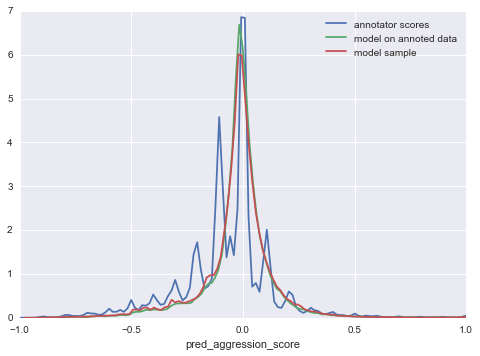

In [11]:
# annotations
sns.distplot(d['annotated']['aggression_score'].dropna(), hist=False, label = 'annotator scores')

# model on annotated data
sns.distplot(d['annotated']['pred_aggression_score'].dropna(), hist=False, label = 'model on annoted data')

#model no admin sample
sns.distplot(d['sample']['pred_aggression_score'].dropna(), hist=False, label = 'model sample')

plt.xlim(-1, 1)
plt.legend()

### Q: How does the distribution over attack probabilities compare across annotators vs models and different data sets

This is mainly a sanity check that the attack model is working new data

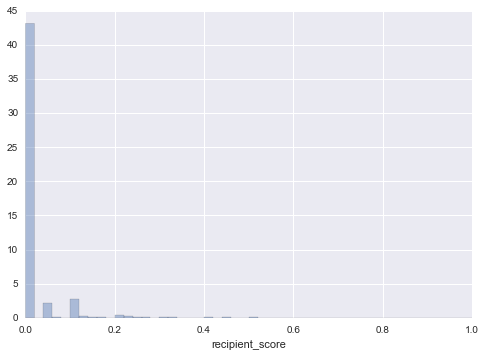

In [12]:
sns.distplot(d['annotated']['recipient_score'].dropna(), kde =False, norm_hist = True)

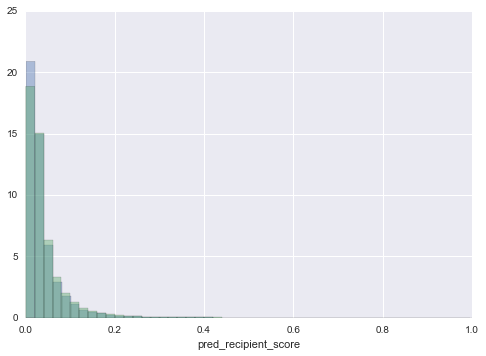

In [13]:
sns.distplot(d['annotated']['pred_recipient_score'].dropna(), kde =False, norm_hist = True)
sns.distplot(d['sample']['pred_recipient_score'].dropna(), kde =False, norm_hist = True)